# Introduciton to Regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of variables.

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np;
print(np.__version__)

import pandas as pd
print(pd.__version__)

import matplotlib.pyplot as plt;
from tensorflow.keras.utils import plot_model


2.8.0
1.22.3
1.4.1


# Creating Data to View and Fit.

[ True  True  True  True  True  True  True  True]


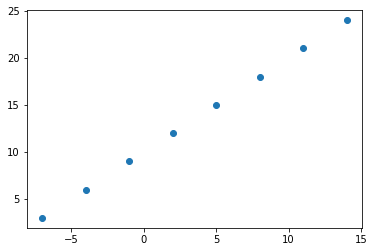

In [2]:
# Create Features ( independeent variables)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables ( dependent variables )
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Relationship between X and Y is Y = X + 10
# This is the function between X and y 
# Relationship between Input Feature and Label 
# Relationship between dependent variable and independent varaible
# Relationship that the neural network will learn
print(y == X + 10)

# Plot the relationship
plt.scatter(X,y)

# Input and Output Shapes


In [3]:
# Were looking at One Input and One output tensor which would be a scalar
# Use One X Value to predict one Y Value and their shapes
X[0], y[0], X[0].shape, y[0].shape

(-7.0, 3.0, (), ())

In [4]:
# Turn the numpy arrays into tensor
Xtensor = tf.constant(X, dtype=tf.float32)
Ytensor = tf.constant(y, dtype=tf.float32)

Xtensor, Ytensor

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in modelling with Tensorflow

In [5]:
# Set the random seed for reproducability
tf.random.set_seed(42)

# Create a model using Sequential API and go through the following
# Sequential -- 
#    Groups a linear stack of layers into a tf.keras.Model
#    provides trianing and inference features on this model
#
#
# Could have written
#    model - tf.keras.Sequential()
#    model.add(tf.keras.layers.Dense(1))
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
# mae -- Mean Absoute Error -- Comparison of predicted vs observed 
#    Computes the mean aboslute between labels and predictions
#    Equation loss = mean( abs(y_true - y_pred), axis = -1)
# SGD -- Stochastic Gradiant Descent -- Need to research
model.compile( 
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]) 

# Fit the model
# 5 oppurtunities of going through all the X and y values test data
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

# Coluns from the output ( How long it took, Loss, function, Metric ( Set to be same as loss funciton ))

Epoch 1/5
1/1 [==============================] - 0s 430ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
# Check out X and Y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [7]:
# Make a predition
# First Prediction with 5 runs is 12.7 -- The Mae show why the mae is 11 pnts off, so the answer should be off to.
# Second Prediction with 5000 runs and the answer is 26.21
model.predict([17])

array([[12.716021]], dtype=float32)

In [8]:
# Problem -- The result is far off where we be even if we add the result to the mae we 
#            are still off.

# Improve the Model

## What could we do
**Create the Model**
1. Add more layers
2. increase the number of hidden units ( alfp called neurons ) within each of the hidden layers
3. Change the activation functions of each layer
**Compiling a model** --
1. Change the optimization function or the learning rate of the optimization function
**Fitting a model**
1. Use more data or more epochs

adam optimizer is the default to start with.  Each optimizer has a learning rate which tells it how much to improve
   The learning rate is pottentially the most important hyperparameter

In [9]:
# A good use of training sets is to split them up and run smaller models os to understand which changes have the best 
# optimization and then run a biger test

In [10]:
#First Optimization increase the number of epochs
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3123 - mae: 10.3123
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1798 - mae: 10.1798
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0473 - mae: 10.0473
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9148 - mae: 9.9148
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7823 - mae: 9.7823
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6498 - mae: 9.6498
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 6.9150 - mae: 6.9150
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9094 - mae: 6.9094
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9038 - mae: 6.9038
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - mae: 6.8981
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8925 - mae: 6.8925
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8869 - mae: 6.8869
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8813 - mae: 6.8813
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8756 - mae: 6.8756
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8700 - mae: 6.8700
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8644 - mae: 6.8644
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8588 - ma

In [11]:
# Changing the number of times the data is changed brough our value closer.
model.predict([17.0])

array([[30.19601]], dtype=float32)

In [12]:
# Create the model with an extra hidden layer
# The result was worse than just change the epochs
# The problem is overfitting -- The neural network is learning the data too well.
# We don't evualute neural networks using metrics, but by providing data it has never seen before 


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

# Evalualte the data
model.predict([17.0])


Epoch 1/100
1/1 [==============================] - 0s 315ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 6ms/step - loss: 3.7351 - mae: 3.7351
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7044 - mae: 3.7044
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7449 - mae: 3.7449
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6776 - mae: 3.6776
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7594 - mae: 3.7594
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 3.6919 - mae: 3.6919
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7307 - mae: 3.7307
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7015 - mae: 3.7015
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7019 - mae: 3.7019
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7114 - mae: 3.7114
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6731 - ma

array([[31.941305]], dtype=float32)

In [13]:
# Change the number of hidden units and take away the activation function

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

# Evalualte the data
model.predict([17.0])

Epoch 1/100
1/1 [==============================] - 0s 288ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.7228 - mae: 13.7228
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2221 - mae: 13.2221
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7213 - mae: 12.7213
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.2178 - mae: 12.2178
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7090 - mae: 11.7090
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1924 - mae: 11.1924
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6652 - mae: 10.6652
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1247 - mae: 10.1247
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5681 - mae: 9.5681
Epoch 11/100
1/1 [==============================] - 0s 5ms/

Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3040 - mae: 5.3040
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 5.2697 - mae: 5.2697
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 5.2351 - mae: 5.2351
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 5.2000 - mae: 5.2000
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 5.1780 - mae: 5.1780
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 5.2329 - mae: 5.2329
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 5.2873 - mae: 5.2873
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 5.0863 - mae: 5.0863
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 5.0497 - mae: 5.0497
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 5.0127 - mae: 5.0127
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss

array([[30.073225]], dtype=float32)

In [14]:
# Change the optimization function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

# Evalualte the data
model.predict([17])

Epoch 1/100
1/1 [==============================] - 0s 339ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 0.2695 - mae: 0.2695
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2264 - mae: 0.2264
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2391 - mae: 0.2391
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0548 - mae: 0.0548
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0572 - mae: 0.0572
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2081 - mae: 0.2081
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1792 - mae: 0.1792
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1272 - mae: 0.1272
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0606 - mae: 0.0606
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2675 - mae: 0.2675
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2640 - ma

array([[27.324873]], dtype=float32)

# Evaluating a model -- Visualize, Visualise, Visualise

```
Build a model -> evaluate the model -- fit the model --> evaluuate the model --> Repeat again

Should look at the 
    Data
    Model
    Training
    Predictions


In [15]:
# Evaulate a model
#   Try it with unknown data
#   Visualize the 
#      data -- What data are we working with.  What does it look like, 
#      model -- What does the model look like
#      training predictions  -- How does a model perfrom while it learns
#      training How does a model perform when it learns
#  preidctions -- How do the preidctions of a model line up against truth (Originial labels)

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

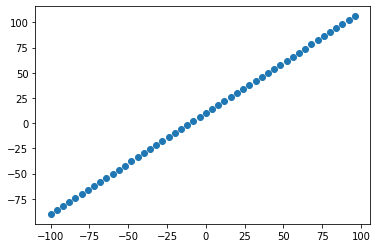

In [18]:
# Visual the data -- Since it is discreete data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [19]:
# When you work on different Neural Nets will have:
#    A training set ( 70 to 80%)    
#    A Validation Set ( 5 to 10%) -- Model gets tuned
#    A Test Set ( 5 to 10%) -- Test what it has learned
#
# With the three datasets we are going towards generalization
#   Generalization -- The ability for a machine learning model to perform well on data it has not seen before
#

# Check the length of the total samples
# Split the data into train and test sets
X_train = X[:40]    # First 80% of the data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

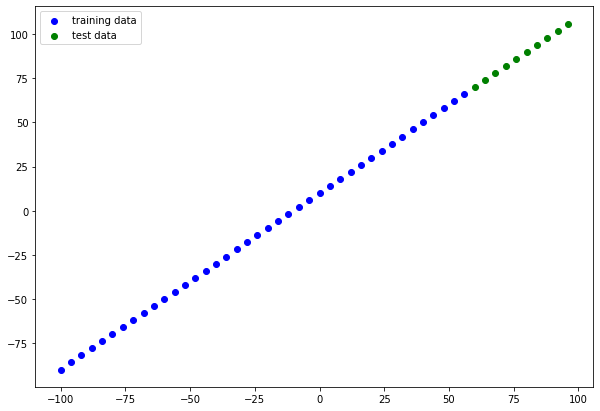

In [20]:
### Visualing the traing and test datasets -- See we got the correct data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color="b", label="training data")
plt.scatter(X_test, y_test,   color="g", label="test data")
plt.legend();

In [21]:
# Take a look at model.builder
# Also Neural Network layer can infer the input shape, buf sometime you might need to set it yourself

tf.random.set_seed(42);

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
], name = "A reqression nueral network")

model.compile( loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [22]:
# Visualizing the model
# Total Params = total parameters ( how many different patterns ) in the layer that the model is trying to learn
# Traminable Parameters -- Parameters ( patterns the model can update as it trains 
#     transfer learning Freeze the transfer model which would make the Trainable/Total Params different)
# Question what does the output really mean ( We know Layer, Output Shape ) -- Look Below
model.summary()

Model: "A reqression nueral network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Can also do 
#    model.build
#
# Create a model which builds automatically be defining the input_shape arugment first layer
# 1st parameter is the dimensoinaltiy 
tf.random.set_seed(42)

# Create a model ( same as above)
# The Dense 1st parameter is units which is the dimensionality of the output space
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='chucks_input_layer'),
    tf.keras.layers.Dense(1, name='chucks_output_layer')
], name='chucks_regession_Nueral_Network')

model.compile( loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Shows the layers, output of the layers and the parameters of each layer
# Dense -- Fully connected Layer -- All neuron are connected to all neurons in the next layer
# total params -- total number of parameters inthe model ( pattern that will be learned )
#     Parameters -- How many different patterns the model will try and learn
# trainable parameters -- Parameters ( patterns ) that the model can update
# When are Total Pararmeters, Trainable, Non-trainable parameters differet
#     Non-Trainable -- These parameters are not update during training ( transfer paraemters
#                      from other models during transfer learning)
# There are two parameters for each neuron in a dense layer ( wieghts, bias vector )
#     
model.summary()

Model: "chucks_regession_Nueral_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 chucks_input_layer (Dense)  (None, 10)                20        
                                                                 
 chucks_output_layer (Dense)  (None, 1)                11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Resource : Check out MIT Introduction to Deep Learning
#Exercise : Try playing around with hddien units and see how that affect the number of parameters
#    total and trainalbe

In [25]:

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 2ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/100
2/2 [==============================] - 0s 26ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/100
2/2 [==============================] - 0s 2ms/step 

In [26]:
model.summary()

Model: "chucks_regession_Nueral_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 chucks_input_layer (Dense)  (None, 10)                20        
                                                                 
 chucks_output_layer (Dense)  (None, 1)                11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


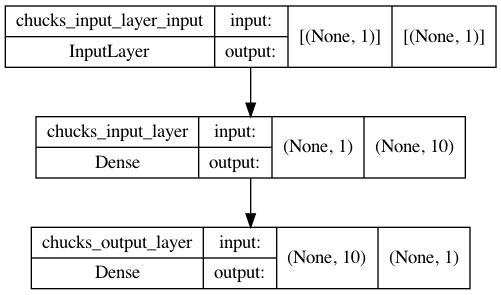

In [27]:
# Shows the flow of the network and the shapes
# Good for complex models and hidden layers
# Use the name attribute to know which layer you are seeing


plot_model(model=model, show_shapes=True)


In [28]:
# Visual the model predictions
# Pl|ot them again the ground truth labels
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[[ 70.552185]
 [ 75.13991 ]
 [ 79.72764 ]
 [ 84.315346]
 [ 88.90308 ]
 [ 93.49081 ]
 [ 98.07852 ]
 [102.666245]
 [107.253975]
 [111.84169 ]]
tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


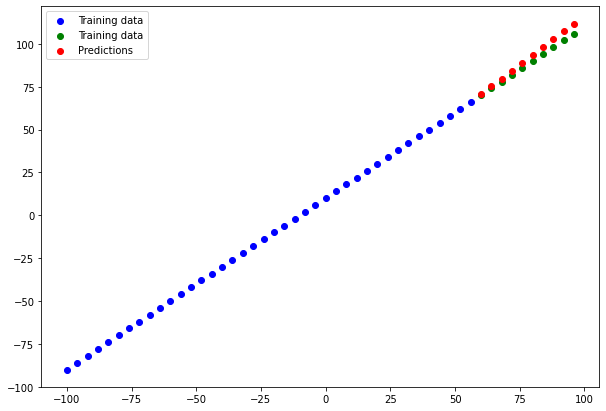

In [29]:
# Build a plot function to understand the predictions
# A Good Reusable Function
def plot_predictions(
    train_data=X_train, train_labels=y_train, 
    test_data=X_test, test_labels=y_test, 
    predictions=y_pred):
    
    '''
        Plot training data, etst data nd compares predctions to ground trush|
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,  color="blue",   label="Training data")
    plt.scatter(test_data,  test_labels,   color="green",  label="Training data")
    plt.scatter(test_data,  predictions,   color="red",    label="Predictions")
    plt.legend()

plot_predictions()
    

In [30]:
# Evaluting out mode's metris with regression evaluation metrics
# Depending on the problem there will be differenttrain evaluation metrics to evaluate your model's
# performance
#
# MAE -- Mean aboslute error -- How wrong is each of the model preidcitons
#       tf.keras.losses.MAE()
#       Greater  Starter -- How wrong are the model predictions
# MSE -- Mean Square Errors -- 
#       tf.keras.losses.MSE
#       When larger errors are more significant than smaller errors due to the difference being squared
#               If being 100 off is far worse than being 10 off
# Huber -- Takss the combinatin of MSE and MAE.  Less sensitive to outliers than MSE
#       tf.keras.losses.Huber()


In [31]:
# Evaluate the model on the test set
# The output is loss, evaluation metric and both come from the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 145ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [32]:
# Running experiments to improve ourt model -- Change only one item per experiment.
# Above -- We created the base model
# Experiment 1 : same as original model, 1 layer, trianed for 100 epochs
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 169ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 8

In [33]:
# Compare the mean absolute error
# Both y_test and y_pred must have the same shape
# mse will typically be greater than since mse is squared 
# make these into metrics info functions

# Compare different tensors 
print("The Shape of y_true is ", tf.shape(y_test))
print("The Shape of y_pred is ", tf.shape(y_pred))

y_pred2 = tf.squeeze(y_pred)
print("Now the shape of y_pred is ", tf.shape(y_pred2))

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred2)
print(mae)

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred2)
print(mse)

huber=tf.keras.losses.Huber()
huber2=huber(y_true=y_test, y_pred=y_pred2)
print(huber2)


The Shape of y_true is  tf.Tensor([10], shape=(1,), dtype=int32)
The Shape of y_pred is  tf.Tensor([10  1], shape=(2,), dtype=int32)
Now the shape of y_pred is  tf.Tensor([10], shape=(1,), dtype=int32)
tf.Tensor(3.19694, shape=(), dtype=float32)
tf.Tensor(13.070127, shape=(), dtype=float32)
tf.Tensor(2.7069669, shape=(), dtype=float32)


In [34]:
# Make some helper funcitons
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Make some helper funcitons
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Running Experiments to improve the model

1. Get more data ( examples) for your model to rain on( more opportunities to learn patterns or relationships between
                                                      features and labels)
2. Make your model larger ( using a more complex model) - this might come in the form of more layers or more hidden
units in each layer)
3. Train for Longer -- Give your model more of a chance to find patterns in the data

In [35]:
# Create nerural networks for first test
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 2ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 8

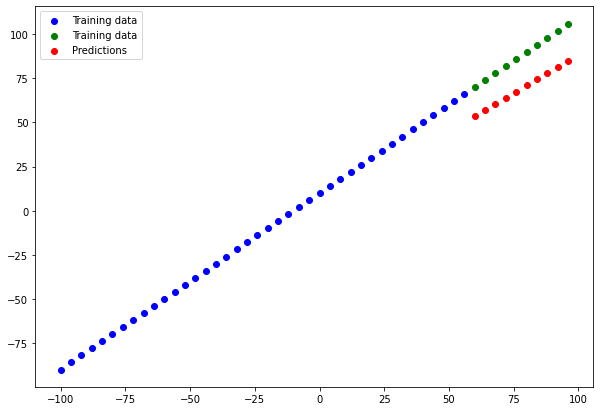

In [36]:
# Track results for model 1
# When running throught the whole book X_test was not the correct dimension need to do more 
# work later on.  Remove the x_test and y_test after figruing it out
y_predictions_1 = model_1.predict(X_test)
plot_predictions(predictions=y_predictions_1)

In [37]:
# find the mean average error

print(mae(y_test, y_predictions_1))
print(mse(y_test, y_predictions_1))

tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.57336, shape=(), dtype=float32)


In [38]:
# Eperiment 2 -- 2 Dense layers trained for a 100 epochs
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 2ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/100
2/2 [==============================] - 0s 4ms/step -

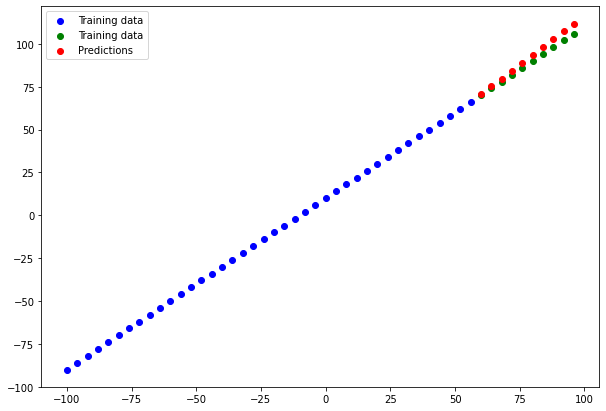

In [39]:
# Track results for model 2
# When running throught the whole book X_test was not the correct dimension need to do more 
# work later on.  Remove the x_test and y_test after figruing it out
y_predictions_2 = model_2.predict(X_test)
plot_predictions(predictions=y_predictions_2)

In [40]:
# find the mean average error

print(mae(y_test, y_predictions_2))
print(mse(y_test, y_predictions_2))

tf.Tensor(3.19694, shape=(), dtype=float32)
tf.Tensor(13.070127, shape=(), dtype=float32)


In [41]:
# Eperiment 3 -- 2 Dense layers trained for a 500 epochs
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae",  "mse"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mae: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935 - mse: 1334.8953
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055 - mse: 1106.8033
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463 - mse: 281.1076
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763 - mse: 2586.0088
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 9.5896 - mae: 9.5896 - mse: 149.3948
Epoch 76/500
2/2 [==============================] - 0s 2ms/step - loss: 12.4371 - mae: 12.4371 - mse: 188.3310
Epoch 77/500
2/2 [==============================] - 0s 3ms/step - loss: 16.6488 - mae: 16.6488 - mse: 429.2706
Epoch 78/500
2/2 [==============================] - 0s 2ms/step - loss: 9.0614 - mae: 9.0614 - mse: 95.4869
Epoch 79/500
2/2 [==============================] - 0s 3ms/step - loss: 23.9675 - mae: 23.9675 - mse: 864.0859
Epoch 80/500
2/2 [==============================] - 0s 2ms/step - loss: 26.7463 - mae: 26.7463 - mse: 1104.4031
Epoch 81/500
2/2 [==============================] - 0s 3ms/step - loss: 11.6714 - mae: 11.6714 - mse: 170.7055
Epoch 82/500
2/2 [==============================] - 0s 2ms/step - loss: 12.0228 - mae: 12.0228 - mse: 211.9191
Epoch 83/500
2/2 [==============================] - 0s 3ms/step - loss: 17.4218 - mae: 17.4218 - mse: 395.5589
Epoch 84/500
2/2 [

2/2 [==============================] - 0s 3ms/step - loss: 18.3065 - mae: 18.3065 - mse: 464.7855
Epoch 149/500
2/2 [==============================] - 0s 3ms/step - loss: 8.1994 - mae: 8.1994 - mse: 106.4584
Epoch 150/500
2/2 [==============================] - 0s 3ms/step - loss: 7.4964 - mae: 7.4964 - mse: 66.4456
Epoch 151/500
2/2 [==============================] - 0s 2ms/step - loss: 18.3374 - mae: 18.3374 - mse: 485.9980
Epoch 152/500
2/2 [==============================] - 0s 3ms/step - loss: 10.2895 - mae: 10.2895 - mse: 130.5616
Epoch 153/500
2/2 [==============================] - 0s 2ms/step - loss: 29.6425 - mae: 29.6425 - mse: 1268.4640
Epoch 154/500
2/2 [==============================] - 0s 3ms/step - loss: 10.5555 - mae: 10.5555 - mse: 201.2336
Epoch 155/500
2/2 [==============================] - 0s 2ms/step - loss: 15.4537 - mae: 15.4537 - mse: 347.2168
Epoch 156/500
2/2 [==============================] - 0s 5ms/step - loss: 17.0174 - mae: 17.0174 - mse: 438.8494
Epoch 157/

2/2 [==============================] - 0s 3ms/step - loss: 35.4567 - mae: 35.4567 - mse: 2108.1008
Epoch 222/500
2/2 [==============================] - 0s 4ms/step - loss: 34.8634 - mae: 34.8634 - mse: 1966.9600
Epoch 223/500
2/2 [==============================] - 0s 3ms/step - loss: 7.9846 - mae: 7.9846 - mse: 119.7548
Epoch 224/500
2/2 [==============================] - 0s 4ms/step - loss: 14.7004 - mae: 14.7004 - mse: 318.5026
Epoch 225/500
2/2 [==============================] - 0s 2ms/step - loss: 16.7196 - mae: 16.7196 - mse: 360.6417
Epoch 226/500
2/2 [==============================] - 0s 5ms/step - loss: 15.9329 - mae: 15.9329 - mse: 369.8892
Epoch 227/500
2/2 [==============================] - 0s 3ms/step - loss: 16.1644 - mae: 16.1644 - mse: 369.5818
Epoch 228/500
2/2 [==============================] - 0s 2ms/step - loss: 13.9324 - mae: 13.9324 - mse: 282.1422
Epoch 229/500
2/2 [==============================] - 0s 3ms/step - loss: 18.0504 - mae: 18.0504 - mse: 457.4229
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 22.7179 - mae: 22.7179 - mse: 780.8715
Epoch 295/500
2/2 [==============================] - 0s 4ms/step - loss: 17.9234 - mae: 17.9234 - mse: 458.5727
Epoch 296/500
2/2 [==============================] - 0s 3ms/step - loss: 6.1742 - mae: 6.1742 - mse: 59.0634
Epoch 297/500
2/2 [==============================] - 0s 2ms/step - loss: 10.9440 - mae: 10.9440 - mse: 254.2858
Epoch 298/500
2/2 [==============================] - 0s 3ms/step - loss: 23.1530 - mae: 23.1530 - mse: 785.9871
Epoch 299/500
2/2 [==============================] - 0s 2ms/step - loss: 17.7331 - mae: 17.7331 - mse: 469.9260
Epoch 300/500
2/2 [==============================] - 0s 3ms/step - loss: 6.9824 - mae: 6.9824 - mse: 65.0501
Epoch 301/500
2/2 [==============================] - 0s 3ms/step - loss: 25.1857 - mae: 25.1857 - mse: 898.2772
Epoch 302/500
2/2 [==============================] - 0s 3ms/step - loss: 8.9025 - mae: 8.9025 - mse: 116.0075
Epoch 303/500


2/2 [==============================] - 0s 2ms/step - loss: 30.4171 - mae: 30.4171 - mse: 1294.6042
Epoch 368/500
2/2 [==============================] - 0s 3ms/step - loss: 10.5020 - mae: 10.5020 - mse: 236.3137
Epoch 369/500
2/2 [==============================] - 0s 2ms/step - loss: 14.9909 - mae: 14.9909 - mse: 330.8540
Epoch 370/500
2/2 [==============================] - 0s 3ms/step - loss: 14.6580 - mae: 14.6580 - mse: 308.0733
Epoch 371/500
2/2 [==============================] - 0s 3ms/step - loss: 23.3672 - mae: 23.3672 - mse: 789.0350
Epoch 372/500
2/2 [==============================] - 0s 3ms/step - loss: 13.1025 - mae: 13.1025 - mse: 290.2273
Epoch 373/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2586 - mae: 9.2586 - mse: 140.7055
Epoch 374/500
2/2 [==============================] - 0s 4ms/step - loss: 9.6648 - mae: 9.6648 - mse: 194.1148
Epoch 375/500
2/2 [==============================] - 0s 2ms/step - loss: 13.0041 - mae: 13.0041 - mse: 237.9866
Epoch 376

2/2 [==============================] - 0s 2ms/step - loss: 15.0962 - mae: 15.0962 - mse: 294.7130
Epoch 441/500
2/2 [==============================] - 0s 3ms/step - loss: 17.4813 - mae: 17.4813 - mse: 487.0568
Epoch 442/500
2/2 [==============================] - 0s 2ms/step - loss: 22.3049 - mae: 22.3049 - mse: 750.9299
Epoch 443/500
2/2 [==============================] - 0s 4ms/step - loss: 23.5841 - mae: 23.5841 - mse: 784.1398
Epoch 444/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0008 - mae: 11.0008 - mse: 203.7588
Epoch 445/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9175 - mae: 14.9175 - mse: 316.4787
Epoch 446/500
2/2 [==============================] - 0s 3ms/step - loss: 17.9979 - mae: 17.9979 - mse: 515.1708
Epoch 447/500
2/2 [==============================] - 0s 3ms/step - loss: 5.4482 - mae: 5.4482 - mse: 51.4485
Epoch 448/500
2/2 [==============================] - 0s 3ms/step - loss: 10.0527 - mae: 10.0527 - mse: 253.4832
Epoch 449

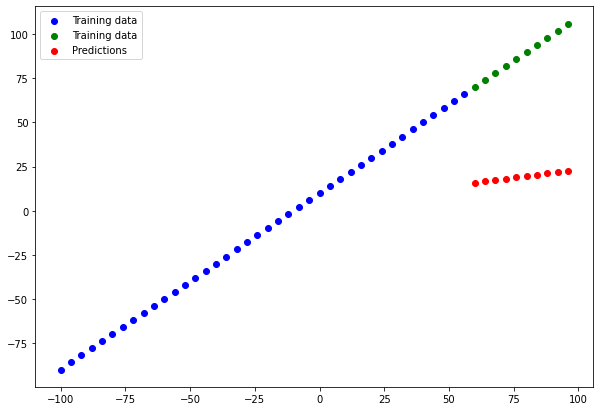

In [42]:
# Track results for model 3
# Prime example of missing the godilocks zone ( Overfitting )
y_predictions_3 = model_3.predict(X_test)
plot_predictions(predictions=y_predictions_3)

In [43]:
# find the mean average error

print(mae(y_test, y_predictions_3))
print(mse(y_test, y_predictions_3))

tf.Tensor(68.713615, shape=(), dtype=float32)
tf.Tensor(4808.0273, shape=(), dtype=float32)


In [44]:
# Compare the results our models results using a pandas Dataframe
model_results = [["model_1", mae(y_test, y_predictions_1).numpy(), mse(y_test, y_predictions_1).numpy()],
                 ["model_2", mae(y_test, y_predictions_2).numpy(), mse(y_test, y_predictions_2).numpy()],
                 ["model_3", mae(y_test, y_predictions_3).numpy(), mse(y_test, y_predictions_3).numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [45]:
# Badsed on the Table above it looked like model_1 performed the best, but in his video 
# it was his video

# Part of modeling is trying many different models and which perfrom best and not best
# One of the main goals should be to minimize the time before experiments
# The more expeirments you will figure out which don't which bring you closer to figuring out
# what does work.
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
## Tracking your experiments
# Track the result of your expreiment by
#   TensorBoard -- Help track tenssor flow experients
#   Weight and Biases -- A tools for tracking all kinds of experiments

In [47]:
# How to save a model  -- Allow us to use them outside google colab or whereever they were 
# trained

# Two Models
#   SavedModel Format -- A serialized fromat which is loaded by tf.keras.models.load_model

#
# Which one to used
#    User your model inside TensorFlow -- SaveModel
#    Outside of Tensorflow -- H5

# save model using the SaveModel Fromat -- Saves the Architecture, weights and state of 
# optimizer
#
# best_model_SaveModel_format is the top level directory of the directories listed below
#      assets
#      variable
#      save_model.pb
model_2.save("best_model_SaveModel_format")

# Save using the HDF5 -- Hierarchery Data Format Version 5 -- Save by adding extension
model_2.save('my_model.h5')



2022-09-26 22:07:15.605416: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [48]:
# How to load a model -- SavedModel
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [49]:
# How to load a HDF% Format File
loaded_h5_model = tf.keras.models.load_model("my_model.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [50]:
# How to download our files to the local machine usijng Google Colab
# You can go to the files tabl and right click on the file that you want to download
# You can  use code from google.colab import files then files.download(<String: filepath")
# Save it to Google Drive by connecting Goodgle Drive and copying it there ( use !c /content/drive/MyDrive/tensorflow_course)